In [1]:
import sys
import ipywidgets as widgets
project_dir = "/Users/octavia/Dropbox/SVE_v2/"
sys.path.append(project_dir + "/utilities")
sys.path.append(project_dir + "/model")

my_modules = ['plot_functions', 'load_model_output']
for mod in my_modules:
    if mod in sys.modules: 
        del sys.modules[mod]


from load_model_output import *
from plot_functions import *
from plot_3D_functions import *

In [2]:

dirs = os.listdir(os.path.join(project_dir , 'model_output/'))
dirs = list(set(dirs) - {'.DS_Store'})
dirs = [d for d in dirs if "inflow" in d]
dirs.sort()
select_base_name = widgets.Dropdown(
    options=dirs,
    description='base_name:',
    disabled=False,
)
select_base_name

Dropdown(description='base_name:', options=('test_inflow', 'test_inflow_dt', 'test_inflow_dx'), value='test_in…

In [3]:
base_name = select_base_name.value
base_dir = os.path.join(project_dir, 'model_output', base_name )

print_input_params(base_dir)

batch:
	tr : 10
sim:
	q1_m2hr : 0.5, 1.0, 2.0, 3.0
	So : 0.01, 0.1
common:
	H_i : 0.0


In [4]:
core = load_sims(base_dir)
name_vars = get_name_vars(base_dir)
core = add_pretty_name(core, name_vars)

# core = patchy_update(core)


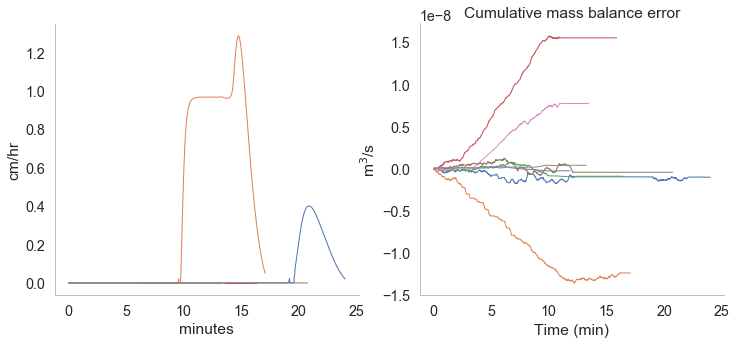

In [5]:
fig,  axes = plt.subplots(1,2, figsize = (12, 5))


plot_hydrographs(core[core.dt_sw == 0.001], nonzero=True, ax= axes[0], label = 0)

fig = summarize_mass_balance(core,ax= axes[1])


In [6]:

names =  get_name_tuples(core, name_vars)

select_key = widgets.Dropdown(
        options=names,
        description='Name:')
select_key

Dropdown(description='Name:', options=(('q1_m2hr=3.0, So=0.01', 'tr-10/So-0.01,q1_m2hr-3.0/'), ('q1_m2hr=3.0, …

In [7]:
key = select_key.value

print(key)
sim = core.loc[key]

tr-10/So-0.01,q1_m2hr-3.0/


(<matplotlib.axes._subplots.AxesSubplot at 0x1a1f439490>,
 <matplotlib.collections.QuadMesh at 0x1a1fff6e50>)

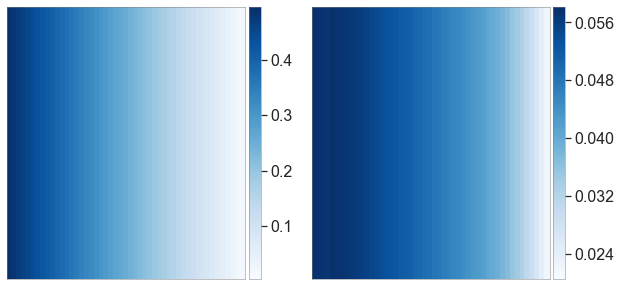

In [8]:
fig,  axes = plt.subplots(1,2, figsize = (10, 5))

arraycolor(sim.zc, axes[0])
arraycolor(sim.uc.max(0), axes[1])

# plt.colorbar()

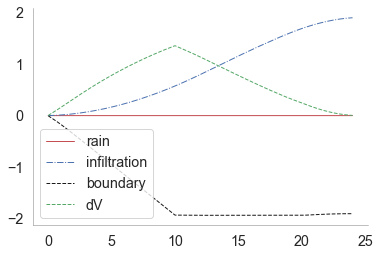

In [9]:
plt.plot(sim.t_h / 60., np.cumsum(sim.rain_series)*sim.area, 'r-', label = "rain")
plt.plot(sim.t_h / 60., np.cumsum(sim.infl_1d ), 'b-.', label = "infiltration")
plt.plot(sim.t_h / 60., np.cumsum(sim.boundary_flux_1d), 'k--', label = "boundary")
plt.plot(sim.t_h / 60., np.cumsum(sim.dvol_1d), 'g--', label = "dV")
plt.legend()

In [10]:

if sim.fV < 1:
    triptych(sim)

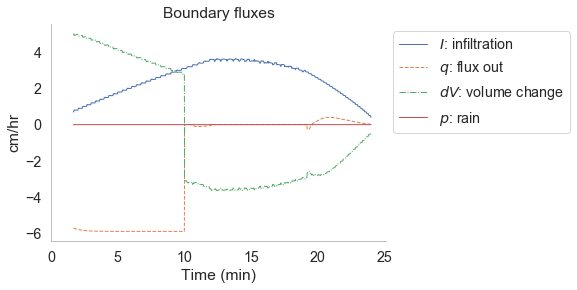

In [11]:
fig = summarize_fluxes(sim, trim = 100)

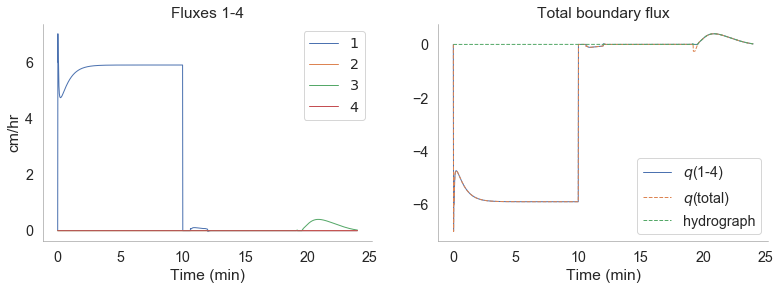

In [12]:
fig = plot_fluxes(sim)

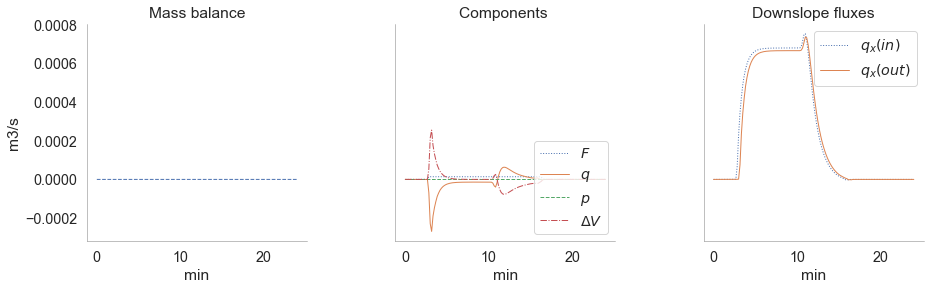

In [13]:
check_cell_fluxes(sim, yi = 3, xi=10);

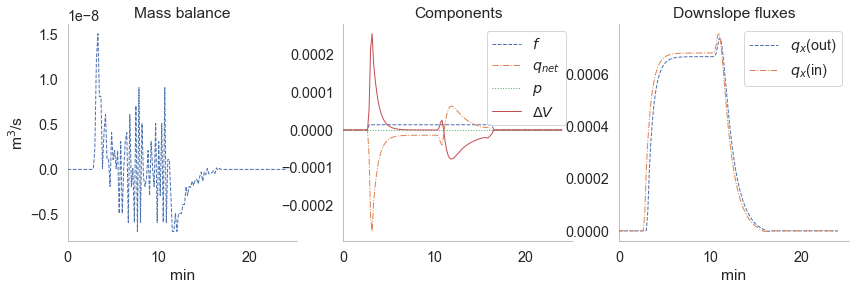

In [14]:
check_band_fluxes(sim, xi = 10, sharey=False);

## Compare `qc = hc*uc` (cell center flux), and `xflux0`... (fluxes at cell edges)

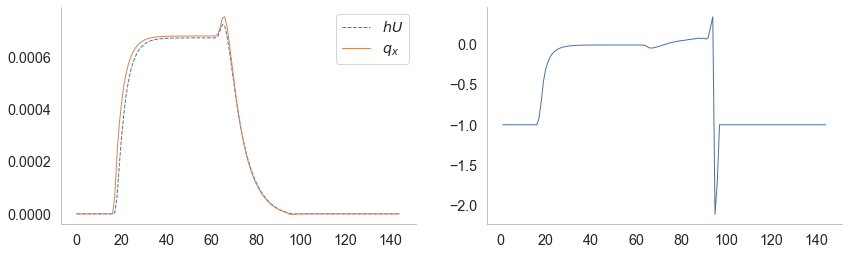

In [15]:
fig, axes = plt.subplots(1, 2, figsize = (14, 4))

ind = 10
qc = (sim.hc*sim.uc).mean(1)[:,ind]
# q_interp = (sim.xflux0.mean(1)[:,ind] + sim.xflux1.mean(1)[:,ind])/2
q_interp = sim.xflux0.mean(1)[:,ind] 

ax = axes[0]
ax.plot(qc, '--', label = "$hU$")
ax.plot(q_interp, label = "$q_x$")
ax.legend()
    
ax = axes[1]
ax.set_title("")
ax.plot((qc - q_interp)/q_interp)